In [34]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [35]:
train, test = tfds.load('cats_vs_dogs', split=['train[:80%]'], with_info=True, as_supervised=True) 

In [36]:
SIZE = 224

def resize_image(img, lable): 
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, (SIZE, SIZE))
    img = img / 255.0
    return img, lable

train_resized = train[0].map(resize_image) 
train_batches = train_resized.shuffle(1000).batch(16)

In [37]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(), 
    Dropout(0.2),
    Dense(1)  # Binary output for cat or dog
])

In [38]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

# Training the model
model.fit(train_batches, epochs=1)

2023-12-12 23:14:17.801840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 334/1164 [=======>......................] - ETA: 26s - loss: 0.1060 - accuracy: 0.9585

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 398/1164 [=========>....................] - ETA: 25s - loss: 0.1012 - accuracy: 0.9614

 420/1164 [=========>....................] - ETA: 24s - loss: 0.0984 - accuracy: 0.9625

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 563/1164 [=============>................] - ETA: 19s - loss: 0.0885 - accuracy: 0.9655

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 979/1164 [========================>.....] - ETA: 5s - loss: 0.0734 - accuracy: 0.9718

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


1005/1164 [========================>.....] - ETA: 5s - loss: 0.0734 - accuracy: 0.9719

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


1027/1164 [=========================>....] - ETA: 4s - loss: 0.0728 - accuracy: 0.9721

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


1081/1164 [==========================>...] - ETA: 2s - loss: 0.0706 - accuracy: 0.9728

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


1093/1164 [===========================>..] - ETA: 2s - loss: 0.0701 - accuracy: 0.9730

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


1164/1164 [==============================] - 40s 32ms/step - loss: 0.0683 - accuracy: 0.9737


1/1 [==============================] - 0s 23ms/step


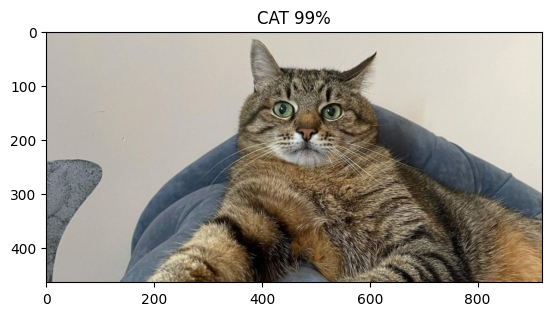

1/1 [==============================] - 0s 23ms/step


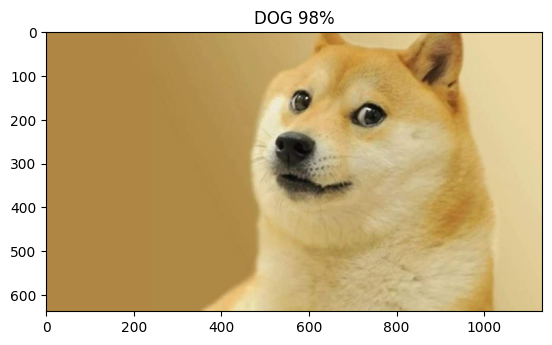

In [40]:
def analyze(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224, 224))  # Resize to the input shape of the model
    img_array = img_to_array(img_resized)
    img_processed = preprocess_input(img_array)
    img_expanded = np.expand_dims(img_processed, axis=0)

    # Predict
    prediction = model.predict(img_expanded)[0][0]
    result = tf.sigmoid(prediction)
    if result < 0.5:
        pred_label = 'CAT'
        percent = (1 - result) * 100
    else:
        pred_label = 'DOG'
        percent = result * 100

    # Display the result
    plt.imshow(img)
    plt.title(f"{pred_label} {int(percent)}%")
    plt.show()


analyze('05.jpeg')  
analyze('06.jpeg') 